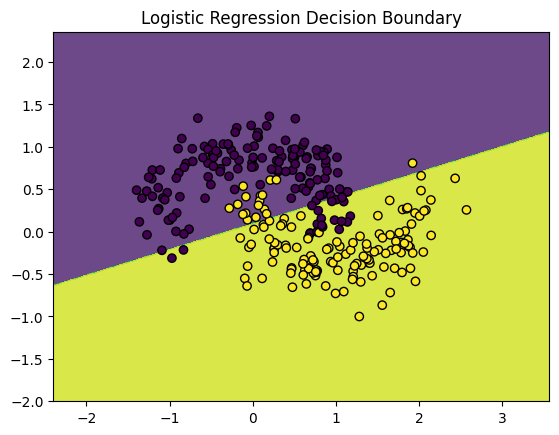

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#generating non-linear noisy data using make_moons, creating 1000 samples, splitting the data into training and testing sets (70-30%)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#training the regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#function which visualizes and plots the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()
plot_decision_boundary(log_reg, X_test, y_test)


/home/agrigoryan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/agrigoryan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/agrigoryan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/agrigoryan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

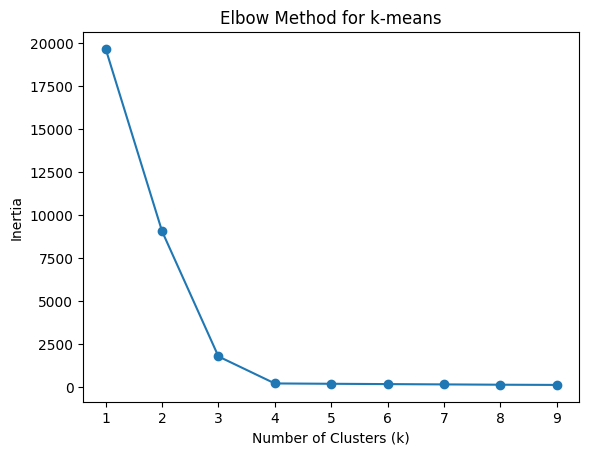

/home/agrigoryan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


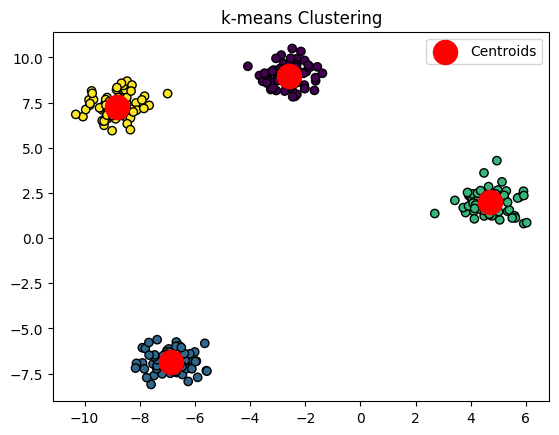

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#generating synthetic data with 300 samples, grouped around 4 clusters, since this is unsupervised learning it is with unused labels
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# the Elbow method to find optimal k
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#plotting the  Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for k-means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#applying k-means clustering with the optimal number of clusters, in this case 4
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

#visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('k-means Clustering')
plt.legend()
plt.show()


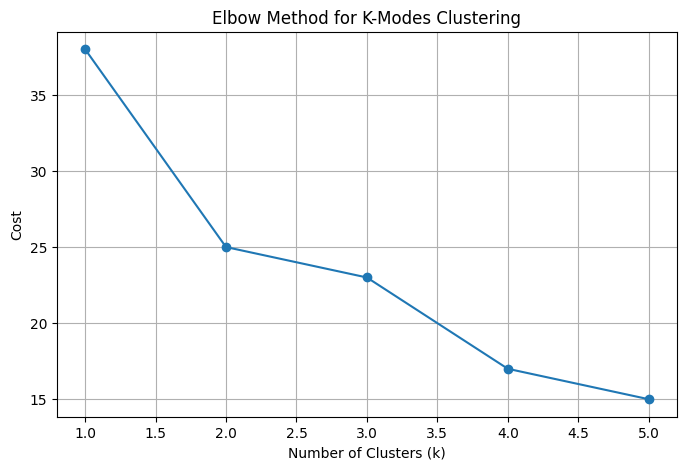

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 19.0
Run 1, iteration: 2/100, moves: 1, cost: 19.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 19.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 22.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 22.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3, cost: 21.0
Best run was number 1

Cluster Assignments: [0 1 0 0 0 2 1 1 0 2 2 0 0 1 2 1 2 0 1 1]

Centroids of the Clusters:
Cluster 1: ['blue' 'SUV' 'domestic']
Cluster 2: ['black' 'sedan' 'imported']
Cluster 3: ['yellow' 'truck' 'domestic']


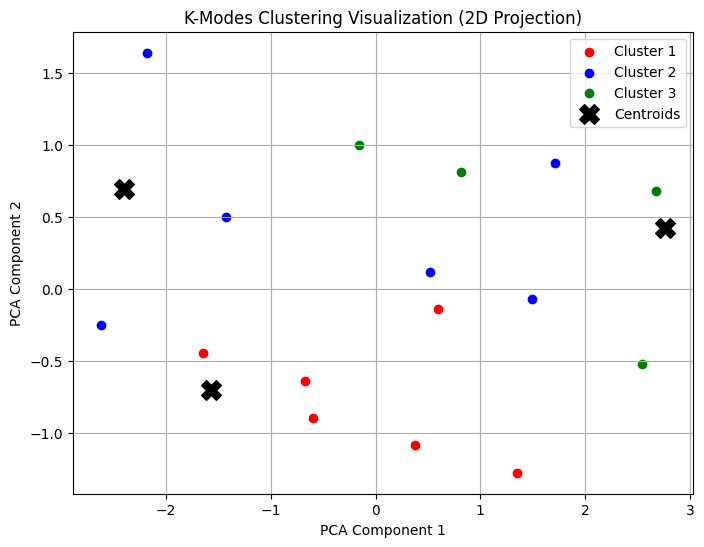

In [7]:
from kmodes.kmodes import KModes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder

#source: https://www.geeksforgeeks.org/revealing-k-modes-cluster-features-with-scikit-learn/

#defining a dataset with categorical features as color, vehicle type, origin

data = np.array([
    ['red', 'SUV', 'domestic'],
    ['blue', 'sedan', 'imported'],
    ['green', 'SUV', 'imported'],
    ['red', 'sedan', 'domestic'],
    ['blue', 'SUV', 'domestic'],
    ['yellow', 'truck', 'domestic'],
    ['white', 'sedan', 'imported'],
    ['black', 'truck', 'imported'],
    ['green', 'SUV', 'domestic'],
    ['yellow', 'sedan', 'domestic'],
    ['red', 'truck', 'domestic'],
    ['blue', 'SUV', 'imported'],
    ['white', 'SUV', 'domestic'],
    ['black', 'sedan', 'imported'],
    ['yellow', 'truck', 'imported'],
    ['red', 'sedan', 'imported'],
    ['green', 'truck', 'domestic'],
    ['blue', 'SUV', 'domestic'],
    ['white', 'truck', 'imported'],
    ['black', 'SUV', 'imported'],
])

# the Elbow method to find the optimal number of clusters k
costs = []
k_values = range(1, 6)
for k in k_values:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    km.fit(data)
    costs.append(km.cost_)

#plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, marker='o')
plt.title('Elbow Method for K-Modes Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.grid()
plt.show()

#applying K-modes clustering with the optimal number of clusters
optimal_k = 3
km = KModes(n_clusters=optimal_k, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)

#displaying cluster assignments and centroids
print("\nCluster Assignments:", clusters)
print("\nCentroids of the Clusters:")
for idx, centroid in enumerate(km.cluster_centroids_):
    print(f"Cluster {idx + 1}: {centroid}")
    
#preparing data for 2D visualization
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(data)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_encoded)

#plotting and visualizing the clusters in 2D
cluster_colors = ['red', 'blue', 'green']
plt.figure(figsize=(8, 6))
for i, color in enumerate(cluster_colors):
    cluster_points = data_2d[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f"Cluster {i+1}")

#plotting the centroids
centroids_2d = pca.transform(encoder.transform(km.cluster_centroids_))
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.title('K-Modes Clustering Visualization (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

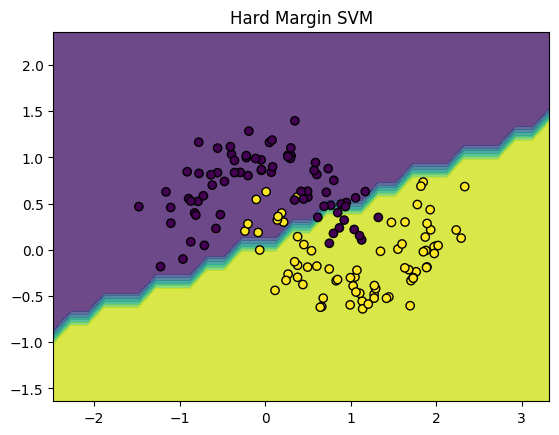

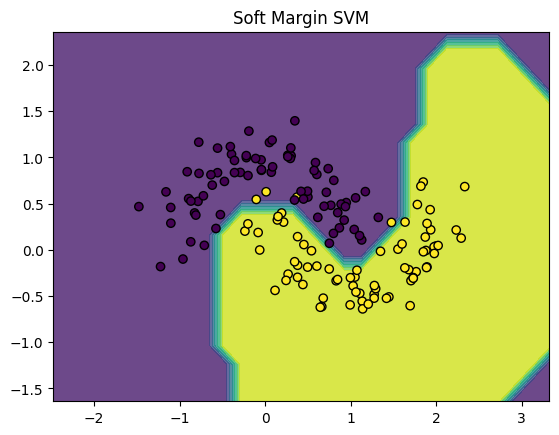

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#generating non-linear noisy data, 500 samples with noise, splitting the data into training and testing sets (70-30%)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#plotting the decision boundary
def plot_decision_boundary(model, X, y, title, step=0.1):   
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #visualizing the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

#Training and plotting for both Hard Margin SVM and Soft Margin SVM
svm_hard = SVC(kernel='linear', C=1e10)
svm_hard.fit(X_train, y_train)
plot_decision_boundary(svm_hard, X_test, y_test, 'Hard Margin SVM', step=0.2)

svm_soft = SVC(kernel='rbf', C=1)
svm_soft.fit(X_train, y_train)
plot_decision_boundary(svm_soft, X_test, y_test, 'Soft Margin SVM', step=0.2)
